In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [262]:
df = pd.read_csv('../../data/canon/Antiviral_canon.csv')

In [263]:
df

,sequence,experimental_characteristics,half_life_seconds,length_sequence,hl_category
0,AAAMSQVTN,Mammalian,15840.0,9,Medium
1,AACEVAKNLNESLIDLQELGKYEQYIKW,Mammalian,15840.0,28,Medium
2,AAGAVVNDL,Mammalian,15840.0,9,Medium
3,AAHLIDALYAEFLGGRVLTT,Mammalian,15840.0,20,Medium
4,AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA,Mammalian,15840.0,45,Medium
...,...,...,...,...,...
2176,YVREHGVPIHADKYFEQVLK,Mammalian,10080.0,20,Medium
2177,YWILEYLWKVPFDFWRGV,E_coli,7200.0,18,Low
2178,YWILEYLWKVPFDFWRGV,Mammalian,10080.0,18,Medium
2179,YWILEYLWKVPFDFWRGV,Yeast,36000.0,18,High


In [264]:
df.shape

(2181, 5)

In [265]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
half_life_seconds,2181.0,26935.790922,53316.387932,2880.0,7200.0,10080.0,15840.0,360000.0
length_sequence,2181.0,17.712059,8.001868,2.0,13.0,16.0,20.0,48.0


In [266]:
grouped=df.groupby(['experimental_characteristics', 'hl_category']).size()
grouped=pd.DataFrame(grouped)
df['hl_category'].value_counts()

hl_category
Low       1027
Medium     634
High       520
Name: count, dtype: int64

In [267]:
display(grouped)

0
experimental_characteristics hl_category     
E_coli                       Low          458
Mammalian                    High         362
                             Low          493
                             Medium       245
Yeast                        High         158
                             Low           76
                             Medium       389

In [268]:
#df.to_csv('../../not_outliers/original.csv')

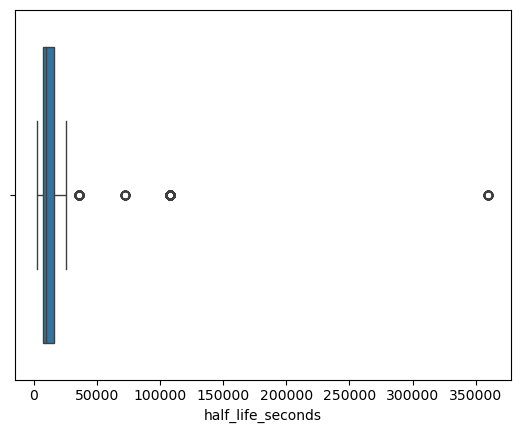

In [269]:
sns.boxplot(data=df, x='half_life_seconds')
plt.show()

In [270]:
df_no_outliers=df[df['half_life_seconds'] < 86400]

df_no_outliers['hl_category']=df['hl_category'].replace({'Low': 0, 'Medium': 1, 'High': 2})
df_no_outliers.rename(columns={'hl_category': 'target'}, inplace=True)
df_no_outliers.to_csv('../../data/not_outliers/notout_antiviral.csv', index=False)

/tmp/ipykernel_24187/3250544861.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_no_outliers['hl_category']=df['hl_category'].replace({'Low': 0, 'Medium': 1, 'High': 2})
/tmp/ipykernel_24187/3250544861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['hl_category']=df['hl_category'].replace({'Low': 0, 'Medium': 1, 'High': 2})
/tmp/ipykernel_24187/3250544861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [271]:
grouped=df.groupby(['experimental_characteristics', 'hl_category']).size()
grouped=pd.DataFrame(grouped)
df['hl_category'].value_counts()
display(grouped)

0
experimental_characteristics hl_category     
E_coli                       Low          458
Mammalian                    High         362
                             Low          493
                             Medium       245
Yeast                        High         158
                             Low           76
                             Medium       389

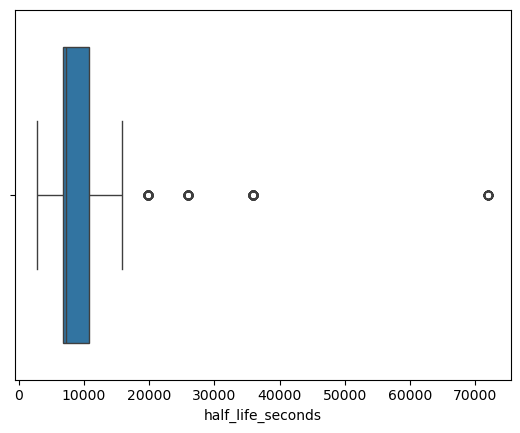

In [272]:
sns.boxplot(data=df_no_outliers, x='half_life_seconds')
plt.show()

In [273]:
#quitar outliers por intercuartil estos se definen típicamente como los valores que están por debajo de Q1−1.5×IQRQ1−1.5×IQR o por encima de Q3+1.5×IQRQ3+1.5×IQR, donde Q1Q1 es el primer cuartil (25%) y Q3Q3 es el tercer cuartil (75%).

In [274]:
Q1 = df['half_life_seconds'].quantile(0.25)
Q3 = df['half_life_seconds'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['half_life_seconds'] >= lower_bound) & (df['half_life_seconds'] <= upper_bound)]

In [275]:
#df_no_outliers.to_csv('../../not_outliers/quantile.csv')

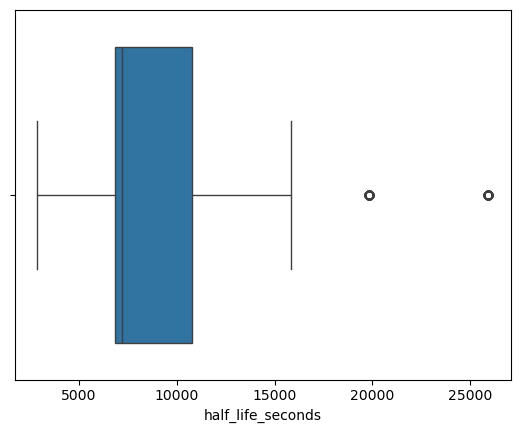

In [276]:
sns.boxplot(data=df_no_outliers, x='half_life_seconds')
plt.show()

In [277]:
#hacerlo por categoria y hacerlo por n veces
mean_value = df['half_life_seconds'].mean()
umbral = mean_value * 3
df_no_outliers = df[df['half_life_seconds'] <= umbral]
#df_no_outliers.to_csv('../../not_outliers/umbral.csv')

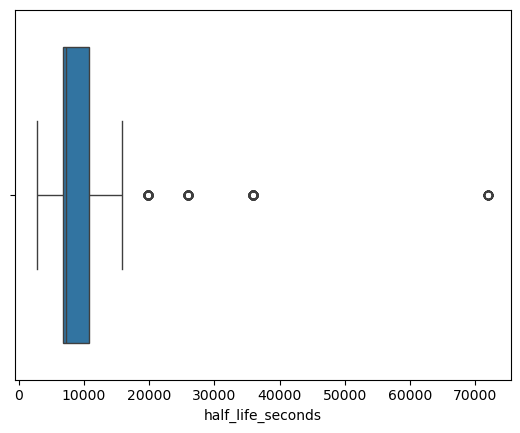

In [278]:
sns.boxplot(data=df_no_outliers, x='half_life_seconds')
plt.show()

In [279]:
df_scaler=df

In [280]:
df_scaler['half_life_seconds_log'] = np.log(df['half_life_seconds'] + 1)

In [281]:
#df_scaler.to_csv('../../not_outliers/scaler.csv')

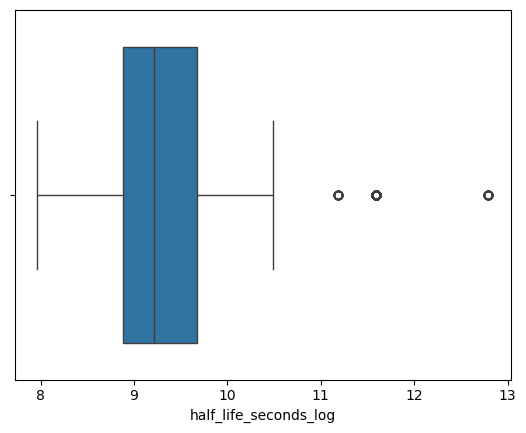

In [282]:
sns.boxplot(data=df_scaler, x='half_life_seconds_log')
plt.show()

In [283]:
mean_value = df['half_life_seconds'].mean()
std_dev = df['half_life_seconds'].std()

umbral_superior = mean_value + 3 * std_dev
umbral_inferior = mean_value - 3 * std_dev

df_no_outliers = df[(df['half_life_seconds'] <= umbral_superior) & (df['half_life_seconds'] >= umbral_inferior)]
#df_no_outliers.to_csv('../../not_outliers/standardesv.csv')

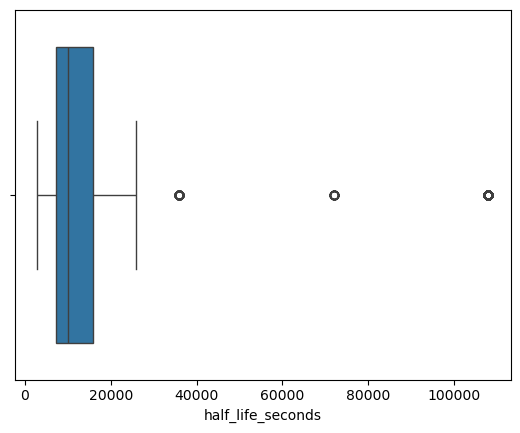

In [284]:
sns.boxplot(data=df_no_outliers, x='half_life_seconds')
plt.show()

In [285]:
lower_percentile = df['half_life_seconds'].quantile(0.01)
upper_percentile = df['half_life_seconds'].quantile(0.99)

df_no_outliers = df[(df['half_life_seconds'] >= lower_percentile) & (df['half_life_seconds'] <= upper_percentile)]
#df_no_outliers.to_csv('../../not_outliers/percentil.csv')

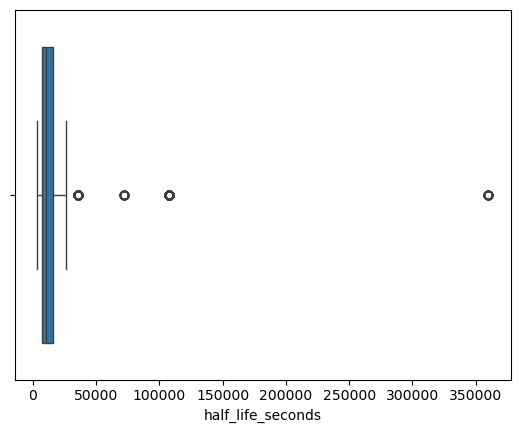

In [286]:
sns.boxplot(data=df_no_outliers, x='half_life_seconds')
plt.show()

In [287]:
from sklearn.cluster import DBSCAN

# Usar DBSCAN para detectar outliers
db = DBSCAN(eps=0.5, min_samples=5)
df['cluster'] = db.fit_predict(df[['half_life_seconds']])

# Filtrar los outliers (identificados con -1)
df_no_outliers = df[df['cluster'] != -1]
#df_no_outliers.to_csv('../../not_outliers/clust.csv')

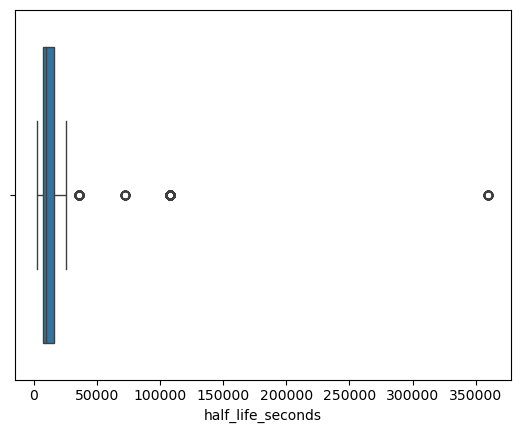

In [288]:
sns.boxplot(data=df_no_outliers, x='half_life_seconds')
plt.show()

In [289]:
from scipy.stats import mstats

df['half_life_seconds_winsorized'] = mstats.winsorize(df['half_life_seconds'], limits=[0.05, 0.05])
#df.to_csv('../../not_outliers/winsor.csv')

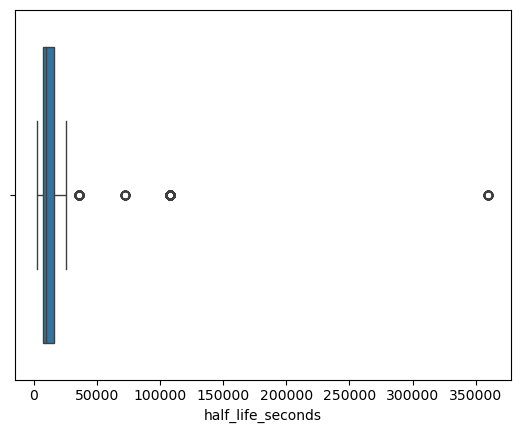

In [290]:
sns.boxplot(data=df_no_outliers, x='half_life_seconds')
plt.show()

In [291]:
from scipy.stats import zscore

df['zscore'] = zscore(df['half_life_seconds'])
df_no_outliers = df[df['zscore'].abs() <= 3]
#df_no_outliers.to_csv('../../not_outliers/zscore.csv')

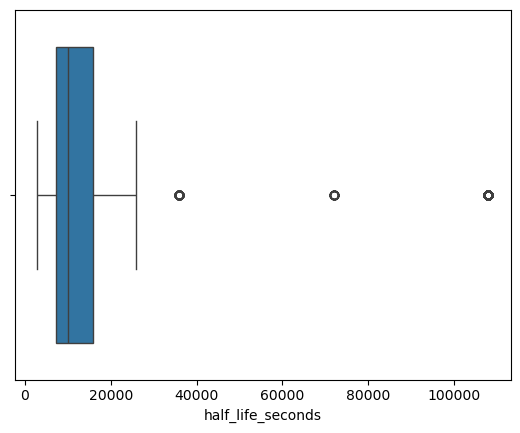

In [292]:
sns.boxplot(data=df_no_outliers, x='half_life_seconds')
plt.show()